In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import (
    train_test_split, 
    cross_validate
)

from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.preprocessing import (
    OneHotEncoder,
    LabelEncoder
)
from yellowbrick.classifier import (
    ROCAUC,
    ConfusionMatrix
)
from sklearn.impute import SimpleImputer

# Classification models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier
)
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier



# Prediction task: This model takes in information about mushrooms and predicts whether the mushrooms are edible or poisonous. The output variable is 'p' or 'e', which stands for 'poisonous' and 'edible' respectively.

# Exploratory Data Analysis

In [283]:
# Load the dataset
dataset = pd.read_csv('agaricus-lepiota.data', header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [284]:
# Add in column names
dataset.columns = ['class', 'cap-shape', 'cap-surface','cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root','stalk-surface-above-ring', 'stalk-surface-below-ring','stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [285]:
# Checking for data types
# All our features are an object or string type, so we need to convert them to numeric type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [286]:
# Checking the number of rows and columns in the dataset
dataset.shape

(8124, 23)

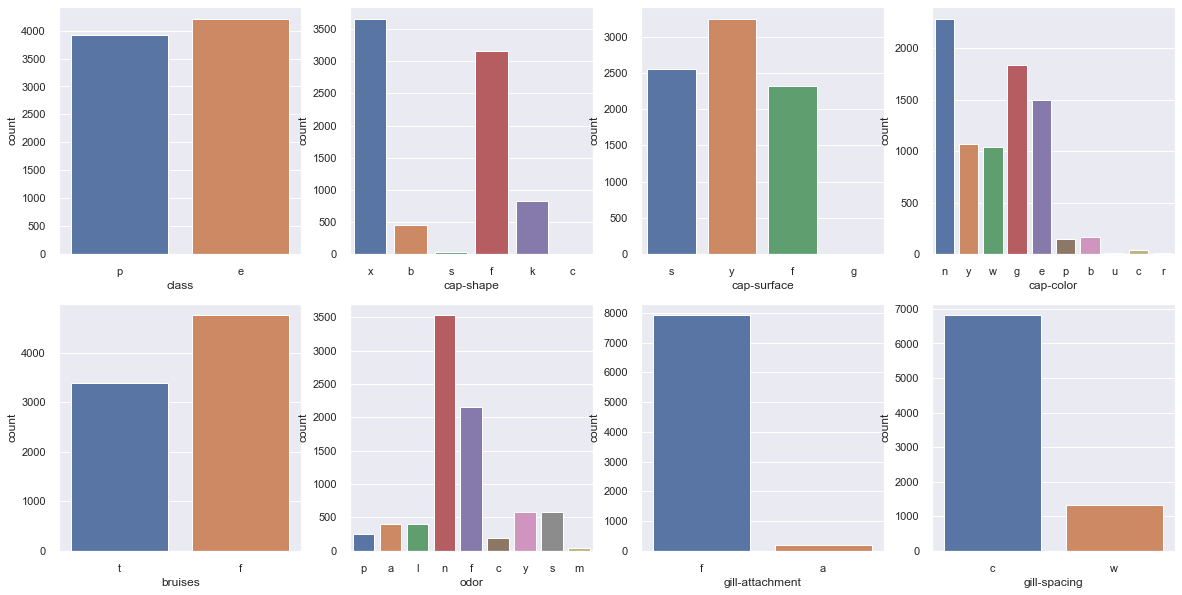

In [287]:
# EDA using countplot
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(['class', 'cap-shape', 'cap-surface','cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing'], ax.flatten()):
    sns.countplot(x=dataset[variable], ax=subplot)

In [288]:
#  Check the number of each cap-surface
df = dataset['cap-surface'].value_counts().reset_index()
df.columns = ['cap-surface', 'count']
print(df)

  cap-surface  count
0           y   3244
1           s   2556
2           f   2320
3           g      4


## Most mushrooms have convex or flat cap-shape. There are very few grooves cap-surfaces. Most mushrooms are either odourless or foul. Nearly all mushrooms have free gill-attachment. Most mushrooms have close gill-spacing.

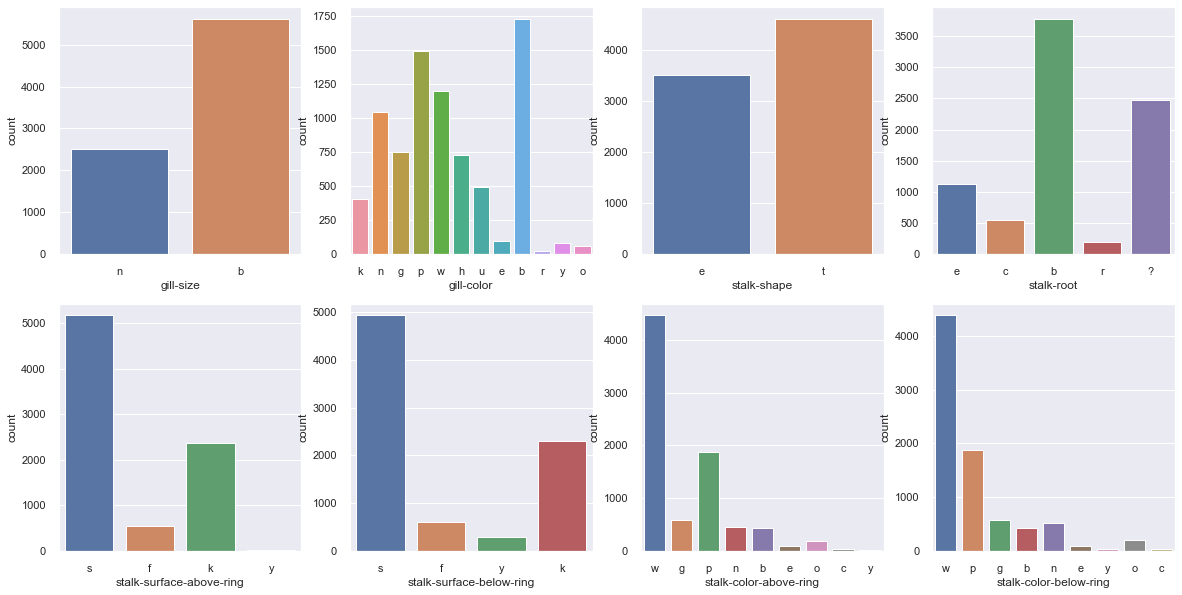

In [289]:
# EDA using countplot
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(['gill-size', 'gill-color', 'stalk-shape', 'stalk-root','stalk-surface-above-ring', 'stalk-surface-below-ring','stalk-color-above-ring', 'stalk-color-below-ring'], ax.flatten()):
    sns.countplot(x=dataset[variable], ax=subplot)

## Most mushrooms have broad gill-size. Most have a bulbous stalk-root. Most have a smooth stalk-surface-above-ring and stalk-surface-below-ring. Most have white stalk-color-above-ring and stalk-color-below ring.

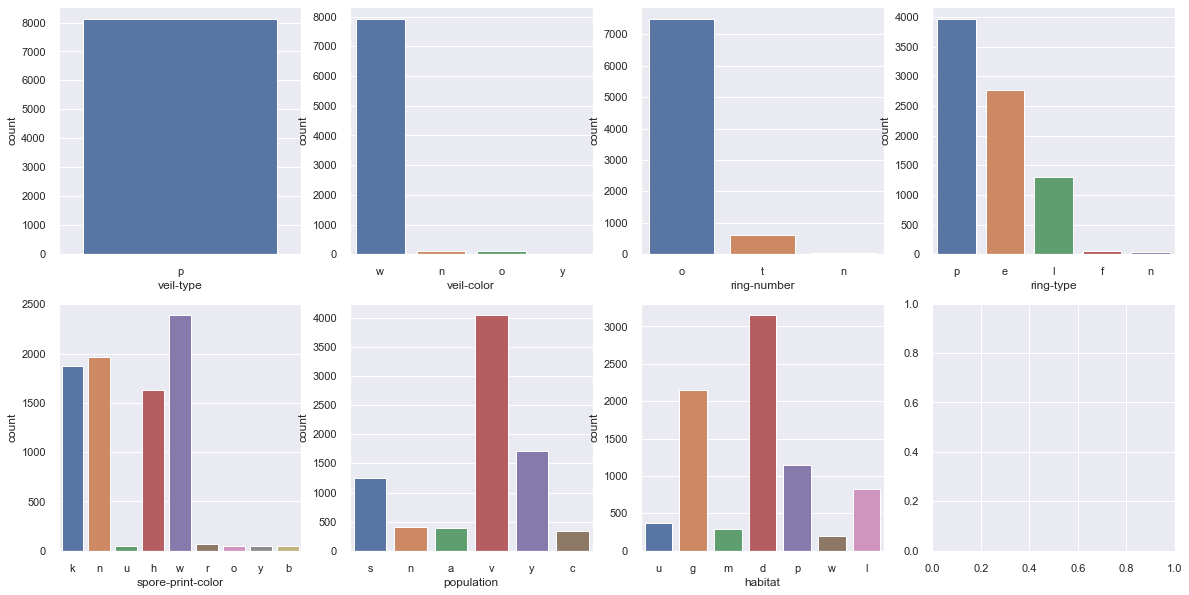

In [290]:
# EDA using countplot
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(['veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'], ax.flatten()):
    sns.countplot(x=dataset[variable], ax=subplot)

## All mushrooms have partial veil-type. Most mushrooms have white veil-color. Most have one ring-number. Most mushrooms have either black, brown, chocolate or white spore-print-color. Most mushrooms have several population. Most mushrooms were found at the woods, grasses and path habitats.

In [291]:
# Check the dataset for null values
# This function checks each column series for "?" values and returns a series of boolean values, turns it into a numpy array and sums up the number of "true"
nullValues = np.sum(dataset.apply(lambda col: col.str.contains('\?')).values) 
print("The number of null values are: " + str(nullValues))

The number of null values are: 2480


In [292]:
# Define features and target
X = dataset.drop("class", axis=1)
y = dataset["class"]
print(X.shape)
print(y.shape)

(8124, 22)
(8124,)


In [293]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [294]:
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [295]:
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [296]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [297]:
# Turn the target column into numeric data type using label encoding
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train_encoded = label_encoder.transform(y_train)
# Check the mappings of the label encoder
le_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(le_name_mapping)
# Turn the array back to a DataFrame
y_train_encoded = pd.DataFrame(y_train_encoded, columns=['class'])
print(y_train_encoded.head())

{'e': 0, 'p': 1}
   class
0      0
1      1
2      0
3      0
4      0


In [298]:
# Turn y_test into numeric data type as well
y_test_encoded = label_encoder.transform(y_test)
# Turn the array back to a DataFrame
y_test_encoded = pd.DataFrame(y_test_encoded, columns=['class'])
print(y_test_encoded.head())

   class
0      1
1      0
2      0
3      1
4      1


In [299]:
# Default parameters
dict_classifiers = {
    "Dummy": DummyClassifier(),
    "Support Vector Machine": SVC(),
    "K Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Perceptron": Perceptron()
}

In [300]:
# Compare different models

result = []

for model, model_instantiation in dict_classifiers.items():
    # Build the pipeline
    steps=[('imputer', SimpleImputer(strategy='most_frequent', missing_values="?")),
        ('oneHotEncoder', OneHotEncoder(drop='first')),
        (model, model_instantiation)]
    
    pipeline = Pipeline(steps)

    # Fit the model on the training set
    pipeline.fit(X_train, np.ravel(y_train_encoded))

    # Evaluate the model
    result_dict = cross_validate(pipeline, X_train, np.ravel(y_train_encoded), scoring=['accuracy', 'roc_auc'], cv=5, n_jobs=3)

    # Append the resulting dictionary into a list
    result.append(result_dict)

# Turn the list of dictionaries into a pandas dataframe
dataframe = pd.DataFrame(result, index=dict_classifiers.keys())

In [301]:
# Create a loop that calculates the mean of each cell/list
for column in dataframe.columns:
    dataframe[column] = dataframe[column].apply(lambda x: sum(x)/len(x))
dataframe.sort_values(by=['test_accuracy', 'test_roc_auc'], ascending=False)

,fit_time,score_time,test_accuracy,test_roc_auc
Support Vector Machine,0.547341,0.215816,1.000000,1.0
K Nearest Neighbors,0.053849,0.886628,1.000000,1.0
Decision Tree,0.050279,0.020532,1.000000,1.0
Random Forest,0.450195,0.076597,1.000000,1.0
Extra Trees,0.383977,0.065432,1.000000,1.0
Perceptron,0.046101,0.019536,0.999846,1.0
Dummy,0.052884,0.019539,0.516849,0.5


In [302]:
# Evaluating the final model
final_model = ExtraTreesClassifier()

# Build the pipeline
steps=[('imputer', SimpleImputer(strategy='most_frequent', missing_values="?")),
        ('oneHotEncoder', OneHotEncoder(drop='first')),
        ('model', final_model)]
    
pipeline = Pipeline(steps)

# Fit the model on the training set
pipeline.fit(X_train, np.ravel(y_train_encoded))

Pipeline(steps=[('imputer',
                 SimpleImputer(missing_values='?', strategy='most_frequent')),
                ('oneHotEncoder', OneHotEncoder(drop='first')),
                ('model', ExtraTreesClassifier())])

In [303]:
# Make predictions
y_pred = pipeline.predict(X_test) 

# Summarize the fit of the model
print(metrics.classification_report(y_test_encoded, y_pred))
print(metrics.confusion_matrix(y_test_encoded, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       849
           1       1.00      1.00      1.00       776

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

[[849   0]
 [  0 776]]


C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


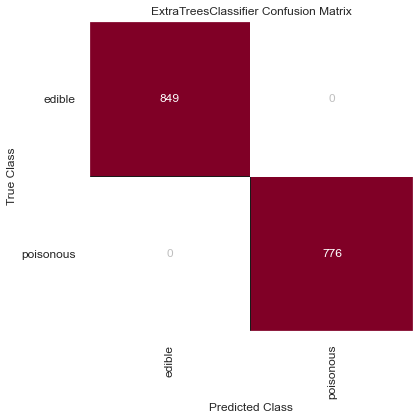

<AxesSubplot:title={'center':'ExtraTreesClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [304]:
# Plot a confusion matrix

mapping = {0: "edible", 1: "poisonous"}
fig, ax = plt.subplots(figsize=(6, 6))

cm_viz = ConfusionMatrix(
    pipeline,
    classes=["edible", "poisonous"],
    label_encoder=mapping,
)
cm_viz.score(X_test, y_test_encoded)
cm_viz.poof()

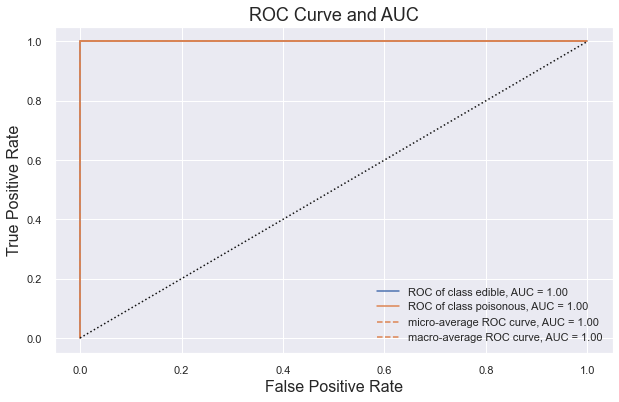

In [305]:
# Plot a ROC curve to check true positive rate against false positive rate
plt.figure(figsize=(10,6))
plt.title("ROC Curve and AUC", fontsize=18)
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
visualizer = ROCAUC(pipeline, classes=["edible","poisonous"])
visualizer.fit(X_train, y_train_encoded)
visualizer.score(X_test, y_test_encoded)
plt.legend()
plt.show()

In [306]:
# Features the model considers important
importances = pipeline.named_steps['model'].feature_importances_

In [307]:
# Get the feature names from the pipeline
feature_names = pipeline.named_steps['oneHotEncoder'].get_feature_names(X_train.columns)

In [308]:
# Display which features are most important to the model
df_importances = pd.DataFrame(importances, index=feature_names, columns=['score'])
df_importances = df_importances.sort_values(by=['score'], ascending=False)
df_importances

,score
odor_n,0.157730
gill-size_n,0.089428
odor_f,0.085729
stalk-surface-above-ring_k,0.058641
ring-type_p,0.053888
...,...
veil-color_o,0.000031
stalk-color-above-ring_o,0.000019
stalk-color-below-ring_e,0.000018
stalk-color-above-ring_e,0.000013


In [309]:
df_importances_top10 = df_importances.head(10)
df_importances_top10

,score
odor_n,0.157730
gill-size_n,0.089428
odor_f,0.085729
stalk-surface-above-ring_k,0.058641
ring-type_p,0.053888
spore-print-color_h,0.039388
stalk-surface-below-ring_k,0.036370
population_v,0.032177
gill-spacing_w,0.032157
bruises_t,0.029895


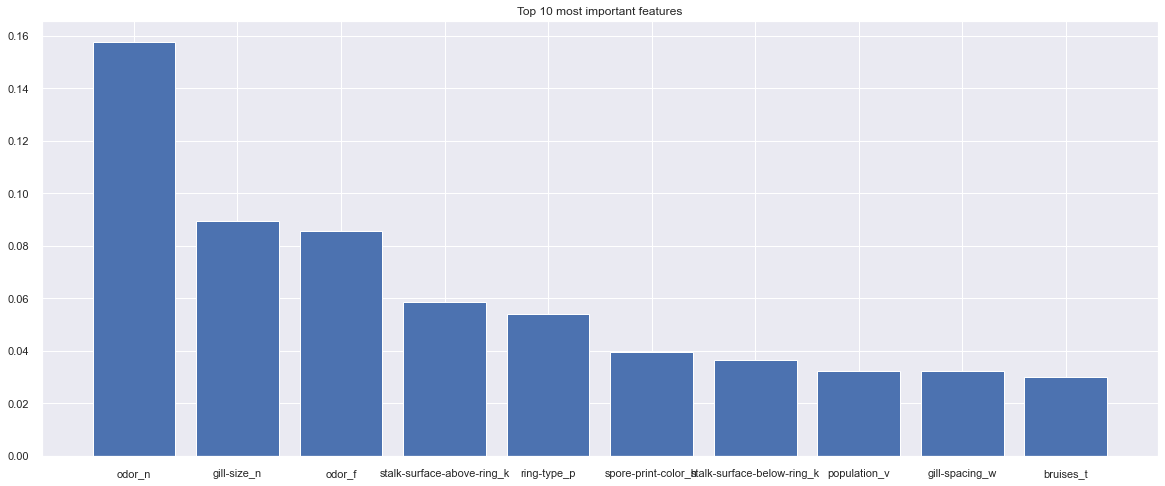

In [310]:
# plot feature importance
fig, ax = plt.subplots(figsize=(20,8))
plt.bar(x=df_importances_top10.index, height=df_importances_top10['score'])
plt.title("Top 10 most important features")
plt.show()

## Odor is the most important feature to the model, followed by gill-size and stalk-surface-above-ring.

In [311]:
# Here we can see that mushrooms with no odor are most likely to be edible.
dataset.groupby("odor").apply(lambda g: g["class"].values)

odor
a    [e, e, e, e, e, e, e, e, e, e, e, e, e, e, e, ...
c    [p, p, p, p, p, p, p, p, p, p, p, p, p, p, p, ...
f    [p, p, p, p, p, p, p, p, p, p, p, p, p, p, p, ...
l    [e, e, e, e, e, e, e, e, e, e, e, e, e, e, e, ...
m    [p, p, p, p, p, p, p, p, p, p, p, p, p, p, p, ...
n    [e, e, e, e, e, e, e, e, e, e, e, e, e, e, e, ...
p    [p, p, p, p, p, p, p, p, p, p, p, p, p, p, p, ...
s    [p, p, p, p, p, p, p, p, p, p, p, p, p, p, p, ...
y    [p, p, p, p, p, p, p, p, p, p, p, p, p, p, p, ...
dtype: object